# Knowledge Distillation in MNIST Dataset

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras_flops import get_flops

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use('_mpl-gallery')

from Utilities import *

# Data loading

In [2]:
mnist_train, mnist_test = loadMnist()

# Load Teacher and Student Models

In [3]:
teacherModel = getTeacherModel()
studenModel = getStudentModel()
fc_model_no_distillation = getStudentModel()


# Train teacher and Student using default temprature

In [4]:
# Training Teacher model
teacherTrainACC = train_evaluate(teacherModel,mnist_train,mnist_test)
teacherTestAcc = testModel(teacherModel,mnist_test)

# Training student model using KD
studentTrainKdACC = train_and_evaluate_using_KD(studenModel,teacherModel,mnist_train,mnist_test,0.5,10)
studentTestAcc = testModel(studenModel,mnist_test)

# Training student model from scratch
studentTrainACC = train_evaluate(fc_model_no_distillation,mnist_train,mnist_test)
teacherTestAcc = testModel(fc_model_no_distillation,mnist_test)


Epoch 1: Class_accuracy: 98.11%
Epoch 2: Class_accuracy: 98.47%
Epoch 3: Class_accuracy: 98.80%
Epoch 4: Class_accuracy: 98.92%
Epoch 5: Class_accuracy: 99.11%
Epoch 6: Class_accuracy: 99.05%
Epoch 7: Class_accuracy: 99.18%
Epoch 8: Class_accuracy: 99.13%
Epoch 9: Class_accuracy: 99.15%
Epoch 10: Class_accuracy: 99.14%
Epoch 11: Class_accuracy: 99.18%
Epoch 12: Class_accuracy: 99.17%
model Testing Accuracy: 99.17%
Epoch 1: Class_accuracy: 96.91%
Epoch 2: Class_accuracy: 97.38%
Epoch 3: Class_accuracy: 97.48%
Epoch 4: Class_accuracy: 97.83%
Epoch 5: Class_accuracy: 97.88%
Epoch 6: Class_accuracy: 97.89%
Epoch 7: Class_accuracy: 98.08%
Epoch 8: Class_accuracy: 98.46%
Epoch 9: Class_accuracy: 98.49%
Epoch 10: Class_accuracy: 98.51%
Epoch 11: Class_accuracy: 98.67%
Epoch 12: Class_accuracy: 98.53%
model Testing Accuracy: 98.53%
Epoch 1: Class_accuracy: 96.66%
Epoch 2: Class_accuracy: 97.24%
Epoch 3: Class_accuracy: 97.63%
Epoch 4: Class_accuracy: 97.58%
Epoch 5: Class_accuracy: 98.02%
Epoc

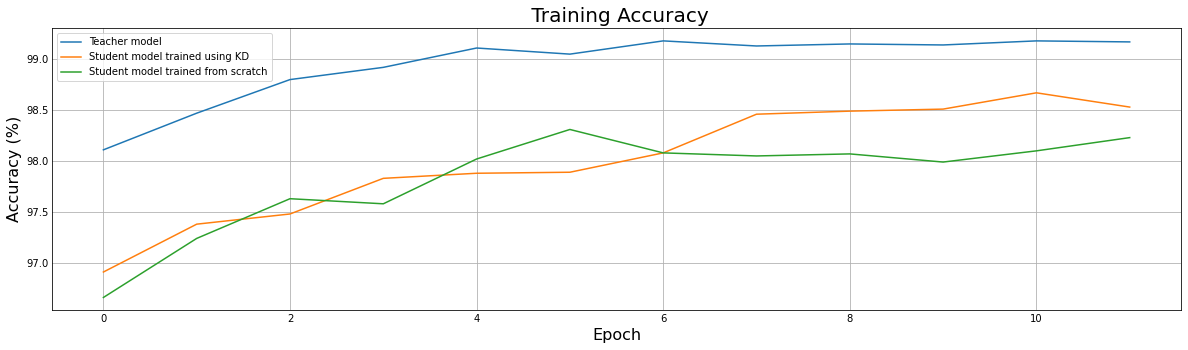

In [5]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(teacherTrainACC, label = "Teacher model")
ax.plot(studentTrainKdACC, label = 'Student model trained using KD')
ax.plot(studentTrainACC, label = 'Student model trained from scratch')
ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Training Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig3.png', bbox_inches='tight')


# Test accuracy vs. tempreture curve

In [6]:
testACC = []
tempratureValues = [1, 2, 4, 16, 32, 64]
for temp in tempratureValues:
    st = getStudentModel()
    train_and_evaluate_using_KD(st,teacherModel,mnist_train,mnist_test,0.5, temp)
    testACC += [float(testModel(st,mnist_test))]

Epoch 1: Class_accuracy: 96.02%
Epoch 2: Class_accuracy: 97.49%
Epoch 3: Class_accuracy: 97.86%
Epoch 4: Class_accuracy: 98.11%
Epoch 5: Class_accuracy: 98.03%
Epoch 6: Class_accuracy: 98.11%
Epoch 7: Class_accuracy: 98.08%
Epoch 8: Class_accuracy: 97.94%
Epoch 9: Class_accuracy: 98.06%
Epoch 10: Class_accuracy: 98.42%
Epoch 11: Class_accuracy: 98.29%
Epoch 12: Class_accuracy: 98.18%
model Testing Accuracy: 98.18%
Epoch 1: Class_accuracy: 96.87%
Epoch 2: Class_accuracy: 97.90%
Epoch 3: Class_accuracy: 97.80%
Epoch 4: Class_accuracy: 97.87%
Epoch 5: Class_accuracy: 97.94%
Epoch 6: Class_accuracy: 98.26%
Epoch 7: Class_accuracy: 97.80%
Epoch 8: Class_accuracy: 98.00%
Epoch 9: Class_accuracy: 97.70%
Epoch 10: Class_accuracy: 97.81%
Epoch 11: Class_accuracy: 98.04%
Epoch 12: Class_accuracy: 97.91%
model Testing Accuracy: 97.91%
Epoch 1: Class_accuracy: 96.73%
Epoch 2: Class_accuracy: 97.28%
Epoch 3: Class_accuracy: 97.77%
Epoch 4: Class_accuracy: 97.63%
Epoch 5: Class_accuracy: 97.92%
Epoc

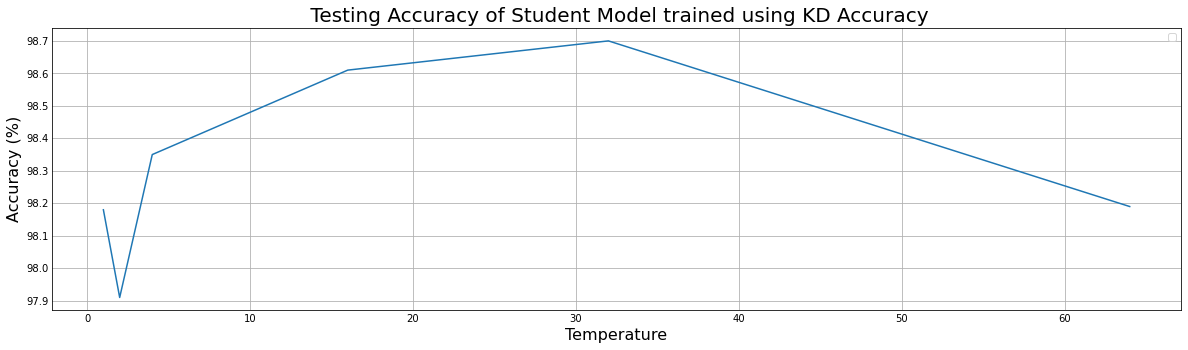

In [7]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(tempratureValues,testACC )
ax.set_xlabel('Temperature', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Testing Accuracy of Student Model trained using KD Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig4.png', bbox_inches='tight')

# Comparing the teacher and student model (number of of parameters and FLOPs) 

In [8]:
# Teacher Model Summary
print( teacherModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                    

In [9]:
# Teacher Model FLOPs
flops = get_flops(teacherModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


FLOPS: 0.022 G


In [10]:
# Student Model Trainable Parameters
print(studenModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Student Model Flops
flops = get_flops(studenModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

FLOPS: 0.00248 G


# Implementing the state-of-the-art KD algorithm

In [12]:
teachingAssistant = getTeachingAssistantModel()
teachingAssistantAcc = train_and_evaluate_using_KD(teachingAssistant,teacherModel,mnist_train,mnist_test,0.5,10)
teachingAssistantTestAcc = testModel(teachingAssistant,mnist_test)
student = getStudentModel()
studentAcc = train_and_evaluate_using_KD(student,teachingAssistant,mnist_train,mnist_test,0.5,10)
studentTestAcc = testModel(student,mnist_test)

Epoch 1: Class_accuracy: 96.56%
Epoch 2: Class_accuracy: 97.16%
Epoch 3: Class_accuracy: 97.20%
Epoch 4: Class_accuracy: 98.22%
Epoch 5: Class_accuracy: 97.87%
Epoch 6: Class_accuracy: 97.53%
Epoch 7: Class_accuracy: 98.12%
Epoch 8: Class_accuracy: 98.15%
Epoch 9: Class_accuracy: 98.04%
Epoch 10: Class_accuracy: 98.24%
Epoch 11: Class_accuracy: 98.53%
Epoch 12: Class_accuracy: 98.17%
model Testing Accuracy: 98.17%
Epoch 1: Class_accuracy: 96.29%
Epoch 2: Class_accuracy: 97.38%
Epoch 3: Class_accuracy: 97.56%
Epoch 4: Class_accuracy: 97.95%
Epoch 5: Class_accuracy: 98.13%
Epoch 6: Class_accuracy: 98.26%
Epoch 7: Class_accuracy: 98.23%
Epoch 8: Class_accuracy: 98.25%
Epoch 9: Class_accuracy: 98.41%
Epoch 10: Class_accuracy: 98.36%
Epoch 11: Class_accuracy: 98.49%
Epoch 12: Class_accuracy: 98.58%
model Testing Accuracy: 98.58%


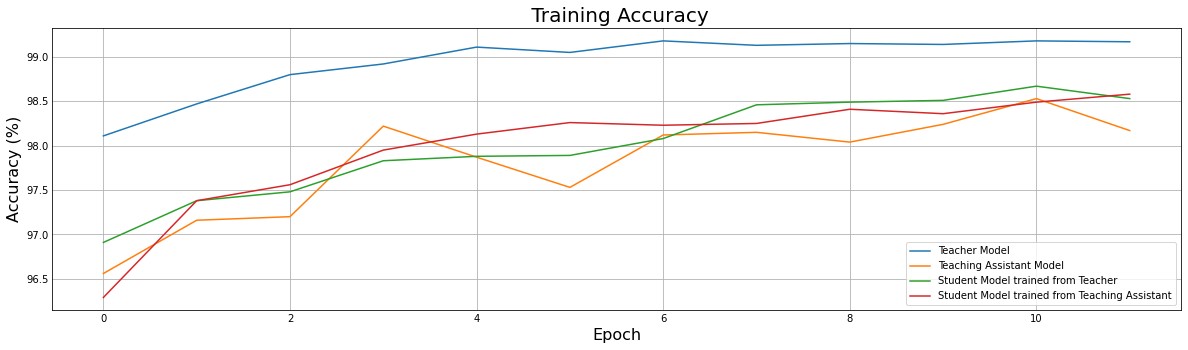

In [13]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(teacherTrainACC, label = "Teacher Model")
ax.plot(teachingAssistantAcc, label = 'Teaching Assistant Model')
ax.plot(studentTrainKdACC, label = 'Student Model trained from Teacher')
ax.plot(studentAcc, label = 'Student Model trained from Teaching Assistant')
ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Training Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig6.png', bbox_inches='tight')